In [2]:
pip install  yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 23.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [4]:
amzn_data = yf.download("AMZN", start="2014-09-25", end="2022-04-01")
amzn_df = pd.DataFrame(amzn_data)
amzn_df.to_csv("amzn_data.csv")

[*********************100%***********************]  1 of 1 completed


In [5]:
amzn_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-25,327.989990,328.540009,321.399994,321.929993,321.929993,2928800
2014-09-26,320.600006,323.500000,317.640015,323.209991,323.209991,3638000
2014-09-29,320.500000,323.750000,319.000000,321.820007,321.820007,1924600
2014-09-30,321.359985,323.429993,318.510010,322.440002,322.440002,2636200
2014-10-01,322.040009,322.170013,315.549988,317.459991,317.459991,3089100
...,...,...,...,...,...,...
2022-03-25,3280.000000,3307.370117,3245.000000,3295.469971,3295.469971,2451600
2022-03-28,3299.500000,3380.750000,3298.000000,3379.810059,3379.810059,2992700
2022-03-29,3407.679932,3416.629883,3357.370117,3386.300049,3386.300049,3307700


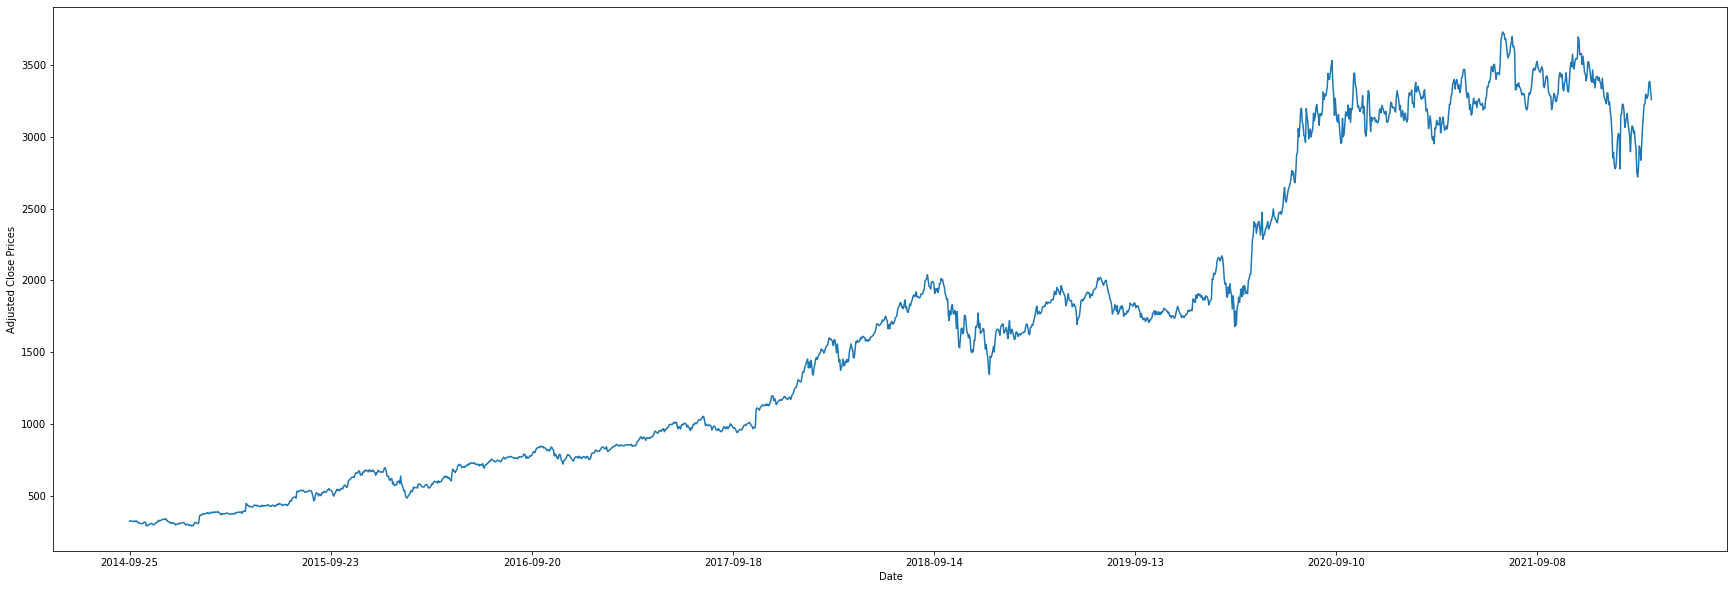

In [8]:
read_df = pd.read_csv("amzn_data.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot(figsize=(30,10))
plt.ylabel("Adjusted Close Prices")
plt.show()

In [9]:
df = pd.read_csv("amzn_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [10]:
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)

In [12]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [13]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[ 642.22495101  618.09960877 3175.15557252 3220.77923671 1591.92403447
 1833.20874563  992.78238907 1588.89738769  698.49834205 3007.79532548
  289.50765885  725.86854565 3482.65656575 1735.37579464  306.00145033
 1754.57789713  809.47719491  429.64575604  372.28388691  382.79853013
 3075.43718618 1447.98530146 3684.01586035  577.40572212 2738.15410449
  810.09096737 3099.66945486  743.97138343 3401.29522889 3457.29484348
  464.47496243 3061.86960875  314.02963328  787.59581286 3278.22839326
 1891.28470262  371.05721353  303.44101343 1699.46614774 2451.62588818
 1822.64678236 1578.401365   3386.80875222  907.69926318  292.95936727
  306.37384086  462.24208415  423.15010592 2043.37871213 3443.81153994
  835.69099797 1974.95818539  982.25710849  722.48338035 1822.8006271
 1500.5194865  3184.68527773  322.08284439  725.457585   1883.68973794
  306.12944833 2783.9383999   632.83506912 1830.040178   3443.72507162
  771.71443272 3692.84477832  771.52810102  384.95561733  296.108657
 1138.185

In [14]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
pr2 = predictions.rename({'': 'Date', 'Predictions': 'Predictions'}, axis=1)
pr2.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(pr2[:252])
oneyear_df.to_csv("one-year-predictions.csv")

Buy price and date
            Predictions
Date                   
10/16/2021  2269.857505
Sell price and date
            Predictions
Date                   
12/22/2021  4523.852405


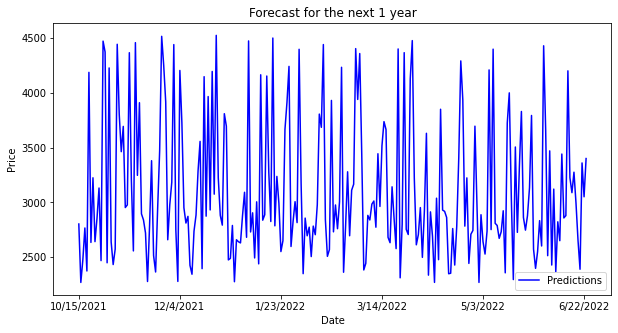

In [16]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [17]:
# creating the dataframe
rf_pred_df = pd.DataFrame(data = predict)
rf_pred_df.columns = ["rf predicted prices"]

In [18]:
rf_pred_df

,rf predicted prices
0,642.224951
1,618.099609
2,3175.155573
3,3220.779237
4,1591.924034
...,...
374,1786.082078
375,2469.000964
376,796.779851
377,1581.178293


In [19]:

rf_pred_df.to_csv('randomf.csv')